,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


Shape: (1000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Transaction ID,1000.0,NaN,NaN,NaN,500.5,288.819436,1.0,250.75,500.5,750.25,1000.0
Date,1000,345,2023-05-16,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer ID,1000,1000,CUST1000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,1000,2,Female,510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1000.0,NaN,NaN,NaN,41.392,13.68143,18.0,29.0,42.0,53.0,64.0
Product Category,1000,3,Clothing,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,1000.0,NaN,NaN,NaN,2.514,1.132734,1.0,1.0,3.0,4.0,4.0
Price per Unit,1000.0,NaN,NaN,NaN,179.89,189.681356,25.0,30.0,50.0,300.0,500.0
Total Amount,1000.0,NaN,NaN,NaN,456.0,559.997632,25.0,60.0,135.0,900.0,2000.0


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

After cleaning: missing values per column:
transaction_id      0
date                0
customer_id         0
gender              0
age                 0
product_category    0
quantity            0
price_per_unit      0
total_amount        0
dtype: int64
Duplicates: 0
Invalid dates: 0


total_revenue                   456000
average_order_value              456.0
total_customers                   1000
total_transactions                1000
top_selling_category          Clothing
most_common_gender              Female
average_quantity_per_order       2.514
dtype: object

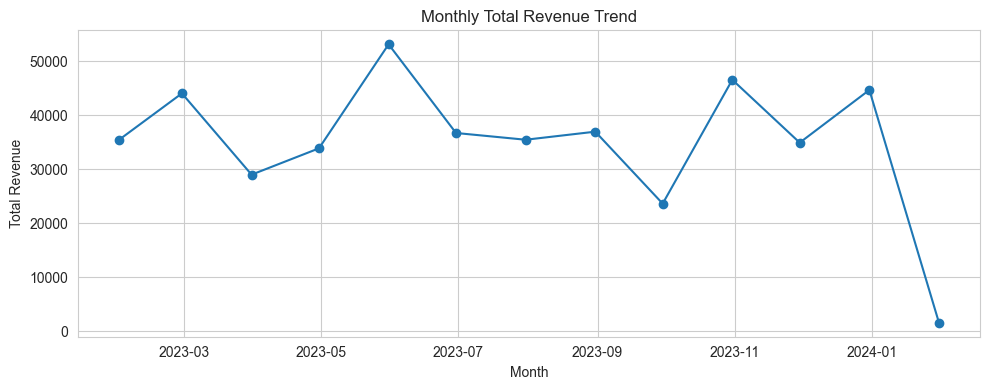

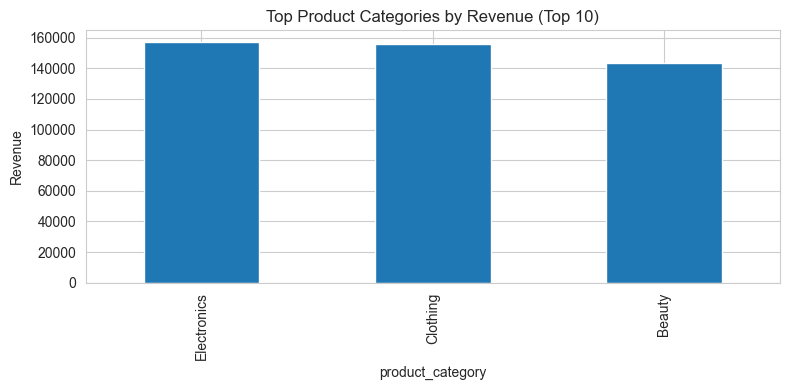

customer_id
CUST015    2000
CUST412    2000
CUST970    2000
CUST547    2000
CUST281    2000
CUST416    2000
CUST420    2000
CUST927    2000
CUST447    2000
CUST342    2000
Name: total_amount, dtype: int64

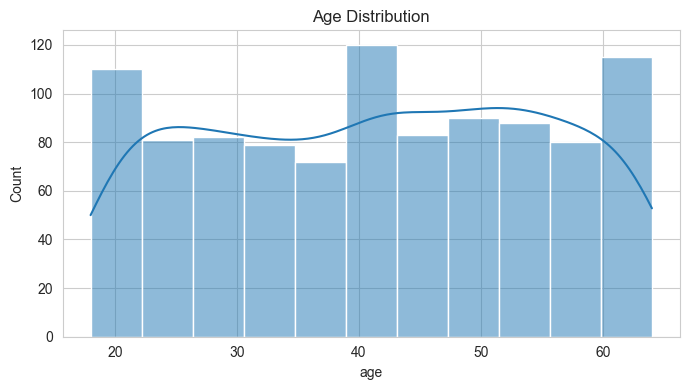

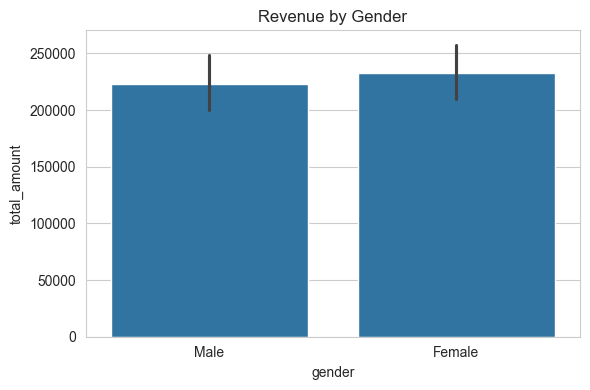

Saved retail_cleaned.csv


,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


transaction_id      0
date                0
customer_id         0
gender              0
age                 0
product_category    0
quantity            0
price_per_unit      0
total_amount        0
dtype: int64

In [26]:
# Cleaned, canonical Retail EDA pipeline - keep this and remove the duplicate/incorrect blocks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)
sns.set_style("whitegrid")

# 1) Load raw data
df = pd.read_csv("raw_retail.csv")
display(df.head())
print("Shape:", df.shape)

# 2) Basic overview
display(df.info())
display(df.describe(include='all').T)
display(df.isnull().sum().sort_values(ascending=False))

# 3) Backup raw
df.to_csv("backup_raw_retail.csv", index=False)

# 4) Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# 5) Drop completely empty columns (if any)
df = df.dropna(axis=1, how='all')

# 6) Impute missing values (numeric -> median, categorical -> "Unknown")
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object','category']).columns

for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

for c in cat_cols:
    df[c] = df[c].fillna("Unknown")

# 7) Remove duplicates
df = df.drop_duplicates()
print("After cleaning: missing values per column:")
print(df.isnull().sum())
print("Duplicates:", df.duplicated().sum())

# 8) Ensure date column is datetime
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    print("Invalid dates:", df['date'].isna().sum())
    df = df.dropna(subset=['date'])  # drop rows with invalid date if any

# 9) Key insights (use the correct columns in your dataset)
insights = {
    'total_revenue': df['total_amount'].sum(),
    'average_order_value': df['total_amount'].mean(),
    'total_customers': df['customer_id'].nunique(),
    'total_transactions': df['transaction_id'].nunique(),
    'top_selling_category': df['product_category'].value_counts().idxmax(),
    'most_common_gender': df['gender'].value_counts().idxmax(),
    'average_quantity_per_order': df['quantity'].mean()
}
display(pd.Series(insights))

# 10) Monthly trend (resample by month-end)
monthly_sales = df.set_index('date').resample('ME').agg({'total_amount':'sum'})
plt.figure(figsize=(10,4))
plt.plot(monthly_sales.index, monthly_sales['total_amount'], marker='o')
plt.title("Monthly Total Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

# 11) Top product categories by revenue
plt.figure(figsize=(8,4))
top_cat = df.groupby('product_category')['total_amount'].sum().sort_values(ascending=False).head(10)
top_cat.plot(kind='bar')
plt.title("Top Product Categories by Revenue (Top 10)")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

# 12) Top 10 customers by revenue
top_customers = df.groupby('customer_id')['total_amount'].sum().sort_values(ascending=False).head(10)
display(top_customers)

# 13) Demographics / distributions
plt.figure(figsize=(7,4))
sns.histplot(df['age'].dropna(), kde=True)
plt.title("Age Distribution")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(data=df, x='gender', y='total_amount', estimator=sum)
plt.title("Revenue by Gender")
plt.tight_layout()
plt.show()

# 14) Save cleaned file
df.to_csv("retail_cleaned.csv", index=False)
print("Saved retail_cleaned.csv")

# 15) Optional verification (reload)
clean_df = pd.read_csv("retail_cleaned.csv")
display(clean_df.head())
display(clean_df.isnull().sum())
